In [1]:
from pymongo import MongoClient
import pandas as pd
import json
from pprint import pprint

# Create database and three collections

> Important:  In MongoDB, a database is not created until it gets content! MongoDB waits until you have created a collection (table), with at least one document (record) before it actually creates the database (and collection).

In [2]:
client = MongoClient("mongodb://localhost:27017/")
db = client["opentarget"]
# db=client.opentarget # creoat/use the opentarget database


In [3]:
study=db.study
variant=db.variant
credset=db.credset

In [4]:
db.list_collection_names()

['study', 'variant', 'credset']

# Import data from files into MongoDB

## using commandline

By using the commandline tool, `mongoimport`, we can directly import data from json file into MongDB.

```
mongoimport --db opentarget --collection study --file study_index_sample.json

mongoimport --db opentarget --collection variant --file variant_index_sample.json

mongoimport --db opentarget --collection credset --file v2d_credset_sample.json


```

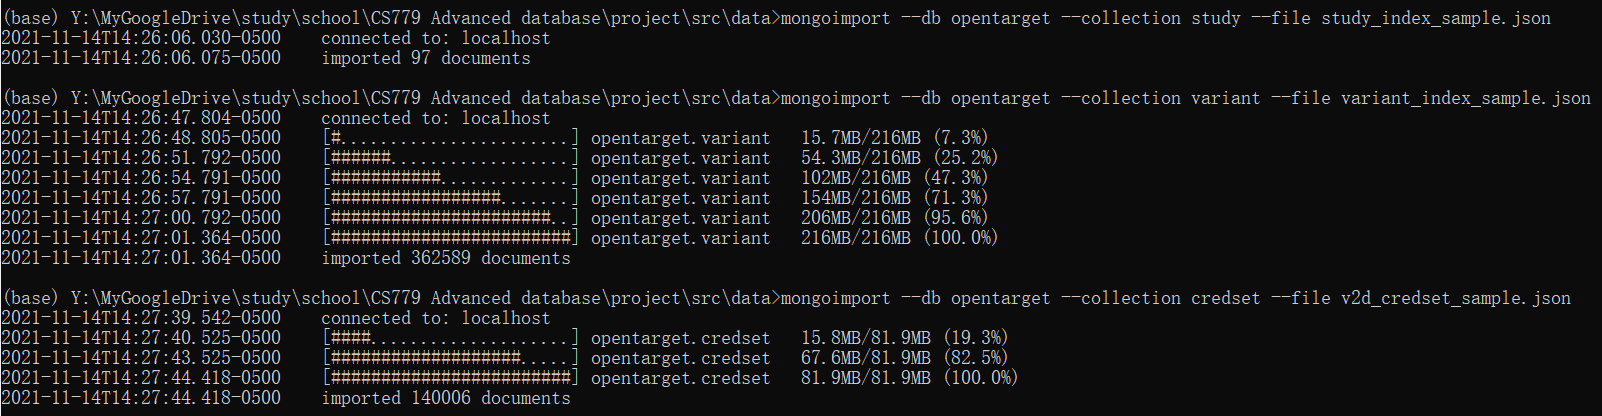

## use python and pymongo

In [5]:
def mongoimport(client, csv_path, db_name, coll_name):
    """ Imports a csv file at path csv_name to a mongo colection
    returns: count of the documants in the new collection
    """
    db = client[db_name]
    coll = db[coll_name]
    data = pd.read_csv(csv_path)
    payload = json.loads(data.to_json(orient='records'))
    coll.delete_many({})
    coll.insert_many(payload)
    return coll.count_documents({})

In [6]:
mongoimport(client, 'data/study_sample.csv', 'opentarget','study')

202

In [7]:
mongoimport(client, 'data/credset_sample.csv', 'opentarget','credset')

68362

In [8]:
mongoimport(client, 'data/variant_sample_withkey.csv', 'opentarget','variant')

43626

In [ ]:
# create index to improve join performance
credset.create_index('study_id')
credset.create_index('tag_variant_id')

In [9]:
# study_collection.drop()

# Explore the data in MongoDB using pyMongo

In [5]:
pprint(study.find_one())

{'_id': ObjectId('619c6ef50bf566f731cc13a1'),
 'ancestry_initial': '["European=113006"]',
 'has_sumstats': True,
 'n_cases': 32384.0,
 'n_initial': 113006,
 'num_assoc_loci': 2,
 'pmid': 'PMID:28604731',
 'pub_author': 'Hammerschlag AR',
 'pub_date': '6/12/17',
 'pub_journal': 'Nat Genet',
 'pub_title': 'Genome-wide association analysis of insomnia complaints '
              'identifies risk genes and genetic overlap with psychiatric and '
              'metabolic traits.',
 'study_id': 'GCST004695',
 'trait_category': 'Nervous system',
 'trait_efos': '["EFO_0004698"]',
 'trait_reported': 'Insomnia complaints'}


In [6]:
pprint(variant.find_one())

{'_id': ObjectId('619c6f040bf566f731cd1f75'),
 'alt_allele': 'G',
 'chr_id': 4,
 'chr_id_b37': 4,
 'gene_id_any': 'ENSG00000248115',
 'gene_id_any_distance': 165445,
 'gene_id_prot_coding': 'ENSG00000128045',
 'gene_id_prot_coding_distance': 248777,
 'gnomad_afr': 0.001148106,
 'gnomad_eas': 0.0,
 'gnomad_nfe': 0.00473227,
 'gnomad_nfe_est': 0.002394428,
 'gnomad_nfe_nwe': 0.006169965,
 'gnomad_nfe_onf': 0.004213483,
 'gnomad_oth': 0.004604051,
 'index': 0,
 'most_severe_consequence': 'intron_variant',
 'phred': 3.122,
 'position': 53111094,
 'position_b37': 53977261,
 'raw': 0.031534,
 'ref_allele': 'A',
 'rs_id': 'rs574753165',
 'variant_id': '4:53111094:A:G'}


In [7]:
pprint(credset.find_one())

{'_id': ObjectId('619c6efb0bf566f731cc146b'),
 'bio_feature': None,
 'is95_credset': True,
 'is99_credset': True,
 'lead_alt': 'G',
 'lead_chrom': 4,
 'lead_pos': 53111094,
 'lead_ref': 'A',
 'lead_variant_id': '4:53111094:A:G',
 'logabf': 14.310652,
 'multisignal_method': 'conditional',
 'phenotype_id': None,
 'postprob': 0.7495363,
 'postprob_cumsum': 0.7495363,
 'study_id': 'GCST004695',
 'tag_alt': 'G',
 'tag_beta': 0.39474,
 'tag_beta_cond': 0.39474,
 'tag_chrom': 4,
 'tag_pos': 53111094,
 'tag_pval': 5e-09,
 'tag_pval_cond': 5e-09,
 'tag_ref': 'A',
 'tag_se': 0.0675027,
 'tag_se_cond': 0.0675027,
 'tag_variant_id': '4:53111094:A:G',
 'type': 'gwas'}


In [8]:
n = 5
for i in study.find():
    n -=1
    pprint(i)
    if n ==0:
        break
    

{'_id': ObjectId('619c6ef50bf566f731cc13a1'),
 'ancestry_initial': '["European=113006"]',
 'has_sumstats': True,
 'n_cases': 32384.0,
 'n_initial': 113006,
 'num_assoc_loci': 2,
 'pmid': 'PMID:28604731',
 'pub_author': 'Hammerschlag AR',
 'pub_date': '6/12/17',
 'pub_journal': 'Nat Genet',
 'pub_title': 'Genome-wide association analysis of insomnia complaints '
              'identifies risk genes and genetic overlap with psychiatric and '
              'metabolic traits.',
 'study_id': 'GCST004695',
 'trait_category': 'Nervous system',
 'trait_efos': '["EFO_0004698"]',
 'trait_reported': 'Insomnia complaints'}
{'_id': ObjectId('619c6ef50bf566f731cc13a2'),
 'ancestry_initial': '["European=117890"]',
 'has_sumstats': True,
 'n_cases': 5092.0,
 'n_initial': 117890,
 'num_assoc_loci': 10,
 'pmid': None,
 'pub_author': 'UKB Neale v2',
 'pub_date': '8/1/18',
 'pub_journal': None,
 'pub_title': None,
 'study_id': 'NEALE2_6148_2',
 'trait_category': 'Nervous system',
 'trait_efos': '["EFO_000

# Join Collections

## Using MongoDB Compass UI

MongoDB is not a relational database, but you can perform a left outer join by using the $lookup stage.

The `$lookup` stage lets you specify which collection you want to join with the current collection, and which fields that should match.


## using pymongo

The lookup returns array so unwind will convert arrays into objects and you can apply comparison to embedded fields.

### Join credset to study table:

In [12]:
pipeline = [{'$lookup': 
                {'from' : 'study',
                 'localField' : 'study_id',
                 'foreignField' : 'study_id',
                 'as' : 'study_credset'}},
            {'$unwind': '$study_credset'},
            {'$project': 
                {'_id':0, 'postprob':1, 'study_credset.study_id':1, 'study_credset.trait_category':1, 'study_credset.postprob':1,'study_credset.type':1}} 
             ]

n = 5
for doc in (credset.aggregate(pipeline)):
    pprint (doc)
    n -=1
    if n ==0:
        break

{'postprob': 0.7495363,
 'study_credset': {'study_id': 'GCST004695',
                   'trait_category': 'Nervous system'}}
{'postprob': 0.09583608,
 'study_credset': {'study_id': 'GCST004695',
                   'trait_category': 'Nervous system'}}
{'postprob': 0.08106411,
 'study_credset': {'study_id': 'GCST004695',
                   'trait_category': 'Nervous system'}}
{'postprob': 0.07208285,
 'study_credset': {'study_id': 'GCST004695',
                   'trait_category': 'Nervous system'}}
{'postprob': 0.93244797,
 'study_credset': {'study_id': 'GCST004695',
                   'trait_category': 'Nervous system'}}


### Join credset to variant table:

In [13]:
pipeline = [{'$lookup': 
                {'from' : 'variant',
                 'localField' : 'tag_variant_id',
                 'foreignField' : 'variant_id',
                 'as' : 'variant_credset'}},
            {'$unwind': '$variant_credset'},
            
            {'$project': 
                {'_id':0,'variant_credset.chr_id':1, 'variant_credset.position':1,'variant_credset.ref_allele':1,
                 'variant_credset.alt_allele':1,'variant_credset.rs_id':1,'variant_credset.most_severe_consequence':1
                }} 
             ]

n = 5
for doc in (credset.aggregate(pipeline)):
    pprint (doc)
    n -=1
    if n ==0:
        break

{'variant_credset': {'alt_allele': 'G',
                     'chr_id': 4,
                     'most_severe_consequence': 'intron_variant',
                     'position': 53111094,
                     'ref_allele': 'A',
                     'rs_id': 'rs574753165'}}
{'variant_credset': {'alt_allele': 'T',
                     'chr_id': 4,
                     'most_severe_consequence': 'intron_variant',
                     'position': 53099535,
                     'ref_allele': 'C',
                     'rs_id': 'rs189916659'}}
{'variant_credset': {'alt_allele': 'T',
                     'chr_id': 4,
                     'most_severe_consequence': 'intron_variant',
                     'position': 53075995,
                     'ref_allele': 'C',
                     'rs_id': 'rs562229505'}}
{'variant_credset': {'alt_allele': 'T',
                     'chr_id': 4,
                     'most_severe_consequence': 'intron_variant',
                     'position': 53046854,
          

### Join credset to both study and variant table at the same time:

NOTE: Have to save the aggregation results into generator. Otherwise, the operation will exceede time limit. The same error happens when doing aggregations using MongoDB Compass.

In [14]:
pipeline = [{'$lookup': 
                {'from' : 'study',
                 'localField' : 'study_id',
                 'foreignField' : 'study_id',
                 'as' : 'study_credset'}},
            {'$unwind': '$study_credset'},
            
            {'$lookup': 
                {'from' : 'variant',
                 'localField' : 'tag_variant_id',
                 'foreignField' : 'variant_id',
                 'as' : 'variant_credset'}},
            {'$unwind': '$variant_credset'},
            
            {'$project': 
                {'_id':0, 'postprob':1, 'study_credset.study_id':1, 'study_credset.trait_category':1, 
                 'study_credset.postprob':1,'study_credset.type':1,'variant_credset.chr_id':1, 
                 'variant_credset.position':1,'variant_credset.ref_allele':1,'variant_credset.alt_allele':1,
                 'variant_credset.rs_id':1, 'variant_credset.most_severe_consequence':1
                }} 
             ]

In [16]:
results = (credset.aggregate(pipeline))
n = 5
for doc in results:
    pprint (doc)
    n -=1
    if n ==0:
        break

{'postprob': 0.7495363,
 'study_credset': {'study_id': 'GCST004695',
                   'trait_category': 'Nervous system'},
 'variant_credset': {'alt_allele': 'G',
                     'chr_id': 4,
                     'most_severe_consequence': 'intron_variant',
                     'position': 53111094,
                     'ref_allele': 'A',
                     'rs_id': 'rs574753165'}}
{'postprob': 0.09583608,
 'study_credset': {'study_id': 'GCST004695',
                   'trait_category': 'Nervous system'},
 'variant_credset': {'alt_allele': 'T',
                     'chr_id': 4,
                     'most_severe_consequence': 'intron_variant',
                     'position': 53099535,
                     'ref_allele': 'C',
                     'rs_id': 'rs189916659'}}
{'postprob': 0.08106411,
 'study_credset': {'study_id': 'GCST004695',
                   'trait_category': 'Nervous system'},
 'variant_credset': {'alt_allele': 'T',
                     'chr_id': 4,
           

### convert the joined table into pandas dataframe:

In [17]:
results = ({'postprob':doc['postprob'], **doc['study_credset'], **doc['variant_credset']} for doc in (credset.aggregate(pipeline)))


In [18]:
n = 3
for doc in results:
    pprint (doc)
    n -=1
    if n ==0:
        break

{'alt_allele': 'G',
 'chr_id': 4,
 'most_severe_consequence': 'intron_variant',
 'position': 53111094,
 'postprob': 0.7495363,
 'ref_allele': 'A',
 'rs_id': 'rs574753165',
 'study_id': 'GCST004695',
 'trait_category': 'Nervous system'}
{'alt_allele': 'T',
 'chr_id': 4,
 'most_severe_consequence': 'intron_variant',
 'position': 53099535,
 'postprob': 0.09583608,
 'ref_allele': 'C',
 'rs_id': 'rs189916659',
 'study_id': 'GCST004695',
 'trait_category': 'Nervous system'}
{'alt_allele': 'T',
 'chr_id': 4,
 'most_severe_consequence': 'intron_variant',
 'position': 53075995,
 'postprob': 0.08106411,
 'ref_allele': 'C',
 'rs_id': 'rs562229505',
 'study_id': 'GCST004695',
 'trait_category': 'Nervous system'}


In [ ]:
# df = pd.DataFrame.from_records(results)
# df.head()